In [2]:
import pandas as pd
from pydataset import data
import seaborn as sns
import matplotlib.pyplot as plt
from acquire import get_iris_data,get_telco_data,get_titantic_data
from env import get_db_url
from prepare import train_validate_test_split
from scipy import stats

## 4. In a jupyter notebook, classification_exercises.ipynb, use a python module (pydata or seaborn datasets) containing datasets as a source from the iris data. Create a pandas dataframe, df_iris, from this data.

In [ ]:
df_iris = data('iris')

print the first 3 rows

In [ ]:
df_iris.head(3)

print the number of rows and columns (shape)

In [ ]:
df_iris.shape

print the column names

In [ ]:
df_iris.columns

print the data type of each column

In [ ]:
df_iris.dtypes

print the summary statistics for each of the numeric variables. Would you recommend rescaling the data based on these statistics?

In [ ]:
df_iris.describe()

In [ ]:
# Scaling does not seem to be required as all data is in cm

## 5. Read the Table1_CustDetails table from your spreadsheet exercises google sheet into a dataframe named df_google_sheets.

In [ ]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1kihBDi60lQX47cLTxNbLjnOnil0kLu922K7i5LM9hxE/edit#gid=1023018493'
csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
df_google_sheets= pd.read_csv(csv_export_url)

assign the first 100 rows to a new dataframe, df_excel_sample

In [ ]:
df_google_sheets_sample = df_google_sheets.head(100)

print the number of rows of your original dataframe

In [ ]:
df_google_sheets.shape[0]

print the first 5 column names

In [ ]:
df_google_sheets.columns[:5]

print the column names that have a data type of object

In [ ]:
df_google_sheets.select_dtypes(include = 'object').columns

compute the range for each of the numeric variables.

In [ ]:
df_google_sheets.select_dtypes(include = 'number').max()-df_google_sheets.select_dtypes(include = 'number').min()

## 6. Download your spreadsheet exercises google sheet as an excel file (File → Download → Microsoft Excel). Read the Table1_CustDetails worksheet into a dataframe named df_excel.


In [ ]:
df_excel = pd.read_excel('innis_spreadsheet_exercises_marder.xlsx')

assign the first 100 rows to a new dataframe, df_excel_sample

In [ ]:
df_excel_sample = df_excel.head(100)

print the number of rows of your original dataframe

In [ ]:
df_excel.shape[0]

print the first 5 column names

In [ ]:
df_excel.columns[:5]

print the column names that have a data type of object

In [ ]:
df_excel.select_dtypes('object').columns

compute the range for each of the numeric variables.

In [ ]:
df_excel.select_dtypes(include = 'number').max()-df_excel.select_dtypes(include = 'number').min()

## 7. Read the data from this google sheet into a dataframe, df_google

In [ ]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'
csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
df_google = pd.read_csv(csv_export_url)

print the first 3 rows

In [ ]:
df_google.head(3)

print the number of rows and columns

In [ ]:
df_google.shape

print the column names

In [ ]:
df_google.columns

print the data type of each column

In [ ]:
df_google.dtypes

print the summary statistics for each of the numeric variables

In [ ]:
df_google.describe()

print the unique values for each of your categorical variables

In [ ]:
for col in df_google[df_google.columns[df_google.nunique()<10]]:
    print(col,': ',df_google[col].unique())

# Data Preparation Exercises

In [3]:
# import splitting and imputing functions
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import numpy as np

### Prepare Iris Data

In [ ]:
iris = get_iris_data()

In [ ]:
iris.head()

In [ ]:
iris = iris.drop(columns=['species_id','measurement_id'])

In [ ]:
dummy_df = pd.get_dummies(iris[['species_name']], dummy_na=False, drop_first=[True])

In [ ]:
iris = pd.concat([iris, dummy_df], axis = 1)
iris.head()

In [ ]:
def prep_iris(iris):
    iris = iris.drop(columns=['species_id','measurement_id'])
    iris = iris.rename(columns={'species_name':'species'})
    dummy_df = pd.get_dummies(iris[['species']], dummy_na=False, drop_first=[True])
    iris = pd.concat([iris, dummy_df], axis = 1)
    iris = iris.drop(columns=['species'])

    return iris

In [ ]:
iris = prep_iris(get_iris_data())

In [ ]:
iris.head()

## Use Titantic dataset

In [ ]:
df = get_titantic_data()

In [ ]:
df = df.drop(columns=['passenger_id','embarked','deck','class','age'])

In [ ]:
dummy_df = pd.get_dummies(df[['sex','embark_town']], dummy_na=False, drop_first=True)
df = pd.concat([df,dummy_df], axis = 1)

In [ ]:
train, test = train_test_split(df,test_size=0.2,random_state=123, stratify=df.survived)

In [ ]:
train.shape

In [ ]:
test.shape

In [ ]:
train, validate = train_test_split(train, test_size=0.3, random_state=123, stratify=train.survived)

In [ ]:
validate.shape

In [ ]:
imputer = SimpleImputer(missing_values = np.nan, strategy='most_frequent')

In [ ]:
imputer = imputer.fit(train[['embark_town']])
imputer.statistics_

In [ ]:
train[['embark_town']] = imputer.transform(train[['embark_town']])
test[['embark_town']] = imputer.transform(test[['embark_town']])
validate[['embark_town']] = imputer.transform(validate[['embark_town']])

In [ ]:
validate.embark_town.value_counts(dropna=False)

In [ ]:
def prep_titantic(df):
    df = df.drop(columns=['passenger_id','embarked','deck','class','age'])
    df.embark_town = df.embark_town.fillna('Southampton')
    dummy_df = pd.get_dummies(df[['sex','embark_town']], dummy_na=False, drop_first=True)
    df = pd.concat([df,dummy_df], axis = 1)
    
    return df.drop(columns=['sex','embark_town'])

In [ ]:
prep_titantic(get_titantic_data())

## Use Telco Dataset

In [ ]:
df = get_telco_data()

In [ ]:
df = df.replace(" ",np.nan)

In [ ]:
df.shape

In [ ]:
df = df.dropna()
df.shape

In [ ]:
df.columns

In [ ]:
df.total_charges = df.total_charges.astype('float64')

In [ ]:
df = df.drop(columns=['payment_type_id','internet_service_type_id','contract_type_id'])

In [ ]:
catcol = df.columns[(df.nunique()<5)&(df.dtypes == 'object')]

In [ ]:
dummy_df = pd.get_dummies(df[catcol], dummy_na=False, drop_first=True)

In [ ]:
df = pd.concat([df,dummy_df],axis=1)

In [ ]:
df.shape

In [ ]:
df = df.drop(columns=catcol)

In [ ]:
df.shape

In [ ]:
def prep_telco(df):
    # replace whitespace only cells with nan
    df = df.replace(" ",np.nan)
    # Drop the rows with NAs 
    df = df.dropna()
    # Change total_charges type to float
    df.total_charges = df.total_charges.astype('float64')
    # Drop unnecessary foreign key ids
    df = df.drop(columns=['payment_type_id','internet_service_type_id','contract_type_id'])
    # Determine the categorical variables - here defined as object data type (non-numeric) and with fewer than 5 values
    catcol = df.columns[(df.nunique()<5)&(df.dtypes == 'object')]
    # Encode categoricals
    dummy_df = pd.get_dummies(df[catcol], dummy_na=False, drop_first=True)
    # Concatenate dummy df to original df
    df = pd.concat([df,dummy_df],axis=1)
    # Remove the original categorical columns after encoding
    df = df.drop(columns=catcol)
    
    return df

In [ ]:
prep_telco(get_telco_data())

## Exploratory Analysis

## Exercises

Continue in your `classification_exercises.ipynb` notebook. Use the iris dataset. As always, add, commit, and push your changes.

1. Split your data into train, validate, and test samples.

In [4]:
from prepare import prep_iris

In [315]:
iris = get_iris_data()
iris = iris.drop(columns=['measurement_id','species_id'])
iris = iris.rename(columns={'species_name':'species'})

Using cached data


In [316]:
train, validate, test = train_validate_test_split(iris, target = 'species')

In [317]:
train.shape, validate.shape, test.shape

((84, 5), (36, 5), (30, 5))

In [318]:
train.head()

,sepal_length,sepal_width,petal_length,petal_width,species
79,5.7,2.6,3.5,1.0,versicolor
36,5.5,3.5,1.3,0.2,setosa
133,6.3,2.8,5.1,1.5,virginica
95,5.7,3.0,4.2,1.2,versicolor
18,5.7,3.8,1.7,0.3,setosa


### 2. Univariate stats:
    - for quantitiative variables: histogram, boxplot, and compute descriptive statistics

In [319]:
numerics = train.columns[train.dtypes=='float64']

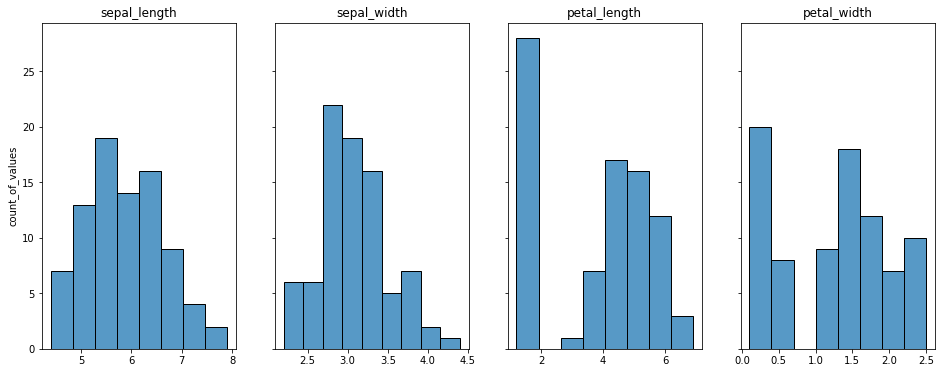

In [320]:
_, ax = plt.subplots(nrows=1, ncols=4, figsize=(16, 6), sharey=True)
for i,col in enumerate(numerics):
    sns.histplot(x=col, data=train, ax=ax[i])
    ax[i].set_xlabel('')
    ax[i].set_ylabel('count_of_values')
    ax[i].set_title(col)


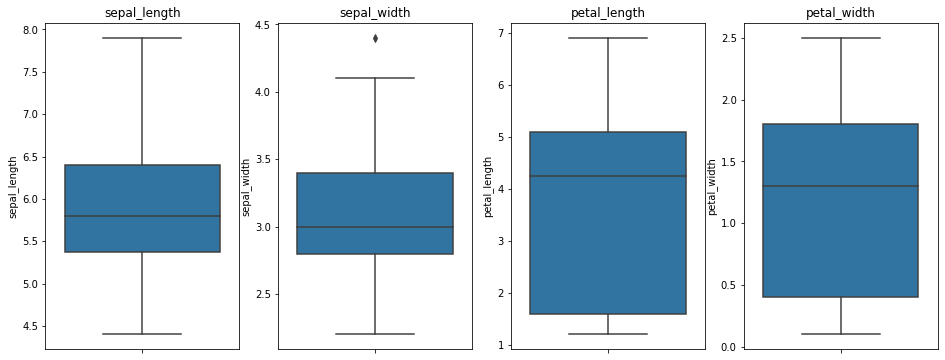

In [321]:
_, ax = plt.subplots(nrows=1, ncols=4, figsize=(16, 6))
for i,col in enumerate(numerics):
    sns.boxplot(y=col, data=train, ax=ax[i])
    ax[i].set_title(col)

In [322]:
train.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,84.000000,84.000000,84.000000,84.000000
mean,5.870238,3.075000,3.771429,1.203571
std,0.769099,0.448256,1.734940,0.752577
min,4.400000,2.200000,1.200000,0.100000
25%,5.375000,2.800000,1.600000,0.400000
50%,5.800000,3.000000,4.250000,1.300000
75%,6.400000,3.400000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


For each species (categorical variable): create a frequency table and a bar plot of those frequencies

Text(0.5, 1.0, 'Species frequency')

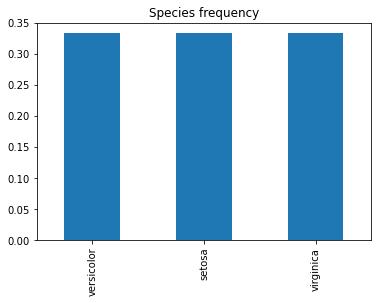

In [323]:
train.species.value_counts(normalize=True).plot.bar()
plt.title('Species frequency')

### Takeaways:
    - Species are evenly distributed in the data set
    - Sepal length and width are fairly normally distributed, petal length and width are not so normal. Petal length is particularly skewed to lower values. 
    - Minimal outliers for the most part - only one is a high value for sepal width
    - Indications of bimodal distribution for petal length

## Bivariate stats

### Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, adding a horizontal line showing the overall mean of the metric (y-axis).

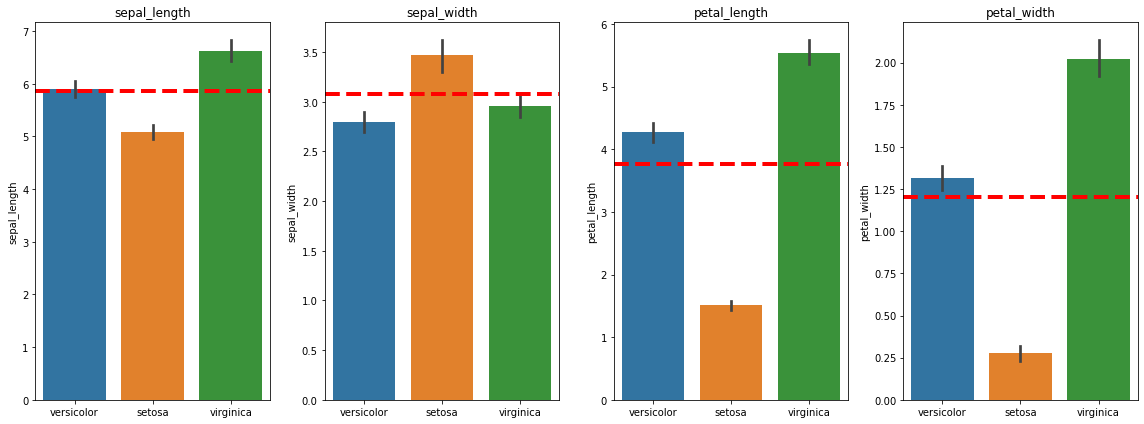

In [324]:
_, ax = plt.subplots(nrows=1, ncols=4, figsize=(16, 6), sharey=False)
for i,col in enumerate(numerics):
    average_value = train[col].mean()
    sns.barplot(x='species', y=col, data=train, ax=ax[i])
    ax[i].set_xlabel('')
    ax[i].axhline(y=average_value,linewidth=4, color='red', ls='--')
    # ax[i].set_ylabel('count_of_values')
    ax[i].set_title(col)
    plt.tight_layout()

In [325]:
train.groupby('species').describe().T

species                setosa  versicolor  virginica
sepal_length count  28.000000   28.000000  28.000000
             mean    5.089286    5.896429   6.625000
             std     0.360390    0.425556   0.532378
             min     4.400000    4.900000   5.800000
             25%     4.875000    5.600000   6.300000
             50%     5.000000    5.800000   6.450000
             75%     5.400000    6.125000   6.900000
             max     5.800000    6.900000   7.900000
sepal_width  count  28.000000   28.000000  28.000000
             mean    3.467857    2.796429   2.960714
             std     0.427788    0.280848   0.318956
             min     2.300000    2.300000   2.200000
             25%     3.275000    2.600000   2.800000
             50%     3.400000    2.800000   3.000000
             75%     3.800000    3.000000   3.100000
             max     4.400000    3.400000   3.800000
petal_length count  28.000000   28.000000  28.000000
             mean    1.507143    4.271429   5.535714
             std     0.184448    0.409930   0.496815
             min     1.200000    3.300000   4.800000
             25%     1.400000    4.000000   5.100000
             50%     1.500000    4.250000   5.500000
             75%     1.600000    4.525000   5.800000
             max     1.900000    5.100000   6.900000
petal_width  count  28.000000   28.000000  28.000000
             mean    0.275000    1.314286   2.021429
             std     0.120570    0.199470   0.293582
             min     0.100000    1.000000   1.500000
             25%     0.200000    1.200000   1.800000
             50%     0.200000    1.300000   2.000000
             75%     0.400000    1.500000   2.300000
             max     0.600000    1.800000   2.500000

In [328]:
a = 0.05
print('Comparing virginica and versicolor:')
for measurement_type in numerics:
    print(f'{measurement_type}:')
    u, p = stats.mannwhitneyu(train[measurement_type][train.species=='virginica'],train[measurement_type][train.species=='versicolor'])
    print("\tIs there a significant difference (p/2<alpha):", p/2<a)

Comparing virginica and versicolor:
sepal_length:
	Is there a significant difference (p/2<alpha): True
sepal_width:
	Is there a significant difference (p/2<alpha): True
petal_length:
	Is there a significant difference (p/2<alpha): True
petal_width:
	Is there a significant difference (p/2<alpha): True


### Significant differences between virginica and versicolor for sepal length, petal length, and petal width
### No significant differences between these species for sepal width
### Actions: compare with 3rd species

## Multivariate stats

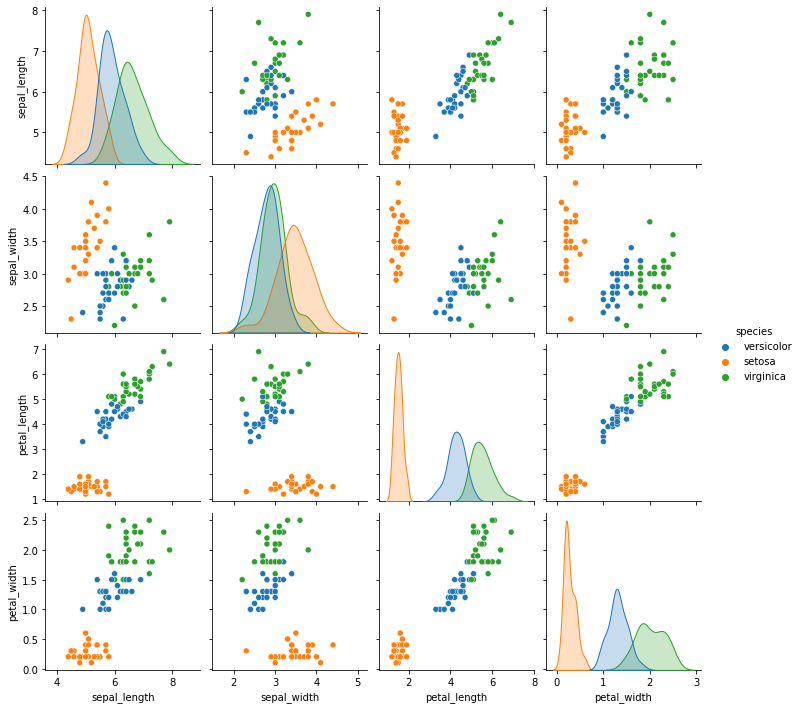

In [329]:
sns.pairplot(data = train, hue = 'species')

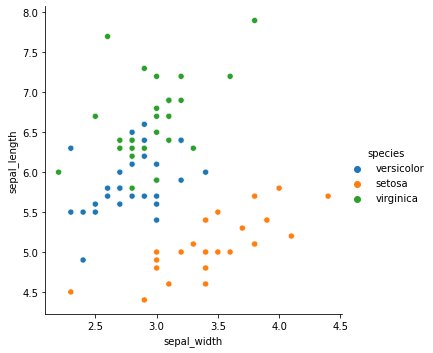

In [19]:
sns.relplot(data = train, x = 'sepal_width', y = 'sepal_length', hue='species')

Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis the measure. Add another dimension using color to represent species. Document takeaways from this visualization.

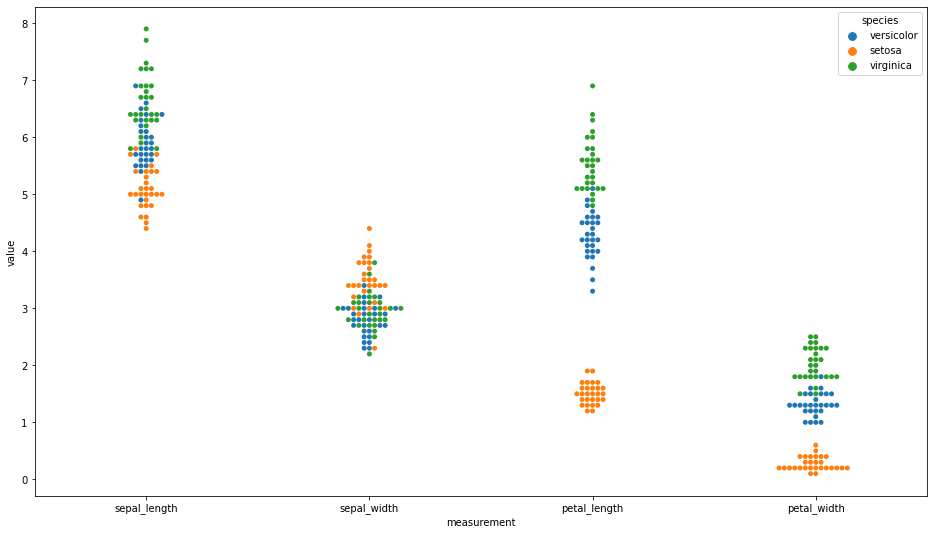

In [20]:
melt = train.melt(id_vars='species', var_name='measurement')
plt.figure(figsize=(16,9))
p=sns.swarmplot(x='measurement',y='value',hue='species', data = melt)
# p.set(yscale='log')

### Takeaways: 
    - variation for petal length and petal width between species is very apparent. Less so for sepal length but still present.
    - sepal width: values are tightly clustered for all 3 species 
    - petal width for all 3 species is not widely distributed

### Ask a specific question: is the ratio of petal length to petal width significantly different between setosa and versicolor?

- $H_0$: there is no significant difference between setosa and versicolor petal length to width ratio
- $H_a$: there is a significant difference between setosa and versicolor petal length to width ratio

In [21]:
train['petal_length_to_width'] = train['petal_length']/train['petal_width']

In [23]:
setosa_plw = train.petal_length_to_width[train.species == 'setosa']
versicolor_plw = train.petal_length_to_width[train.species == 'versicolor']

<AxesSubplot:xlabel='petal_length_to_width', ylabel='Count'>

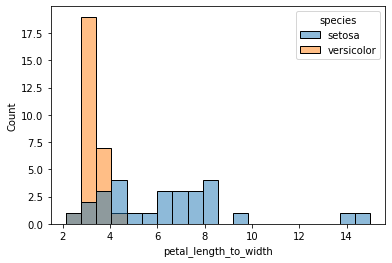

In [31]:
sns.histplot(data = train, x = 'petal_length_to_width', hue = 'species', hue_order = ['setosa','versicolor'])

In [27]:
# Based on small sample size (<30) will use Mann Whitney Test to compare sample means

In [34]:
alpha = 0.05

In [35]:
u, p = stats.mannwhitneyu(setosa_plw, versicolor_plw)

In [36]:
if p/2 < alpha:
    print("Based on Mann Whitney test there is a significant difference in petal length to width ratio between setosa and versicolor")

Based on Mann Whitney test there is a significant difference in petal length to width ratio between setosa and versicolor


### Takeaways:
    - Petal length and width look to offer the best predictors of species

Create a heatmap of each variable layering correlation coefficient on top.

In [39]:
train = train.drop(columns = 'petal_length_to_width')

In [41]:
overall_corr_matrix = train.corr()

<AxesSubplot:>

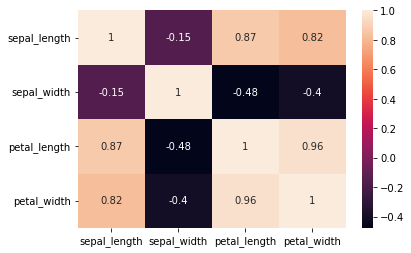

In [330]:
sns.heatmap(data = overall_corr_matrix, annot=True)

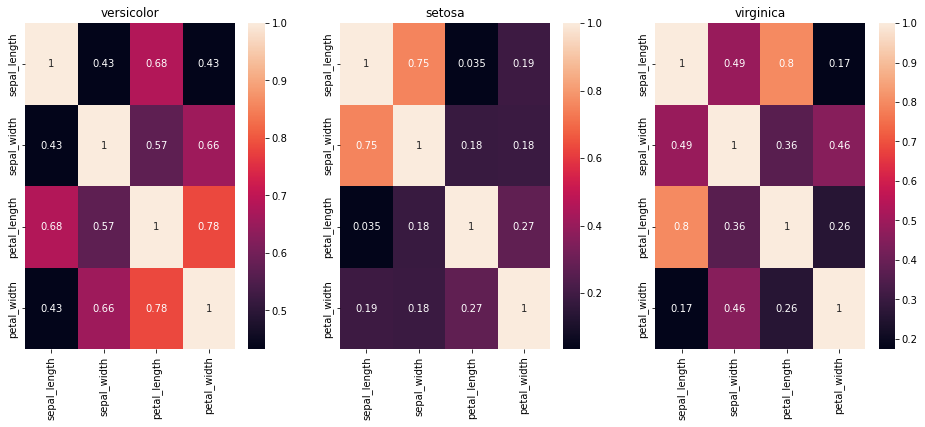

In [54]:
_, ax = plt.subplots(nrows = 1, ncols = len(train.species.unique()), figsize=(16,6))
for i,s in enumerate(train.species.unique()):
    sns.heatmap(data = train[train.species == s].corr(), ax = ax[i],annot=True)
    ax[i].set_title(s)

## Exploratory Analysis Exercises Part II

In [122]:
df = get_titantic_data()

Using cached data


In [123]:
# Drop these columns as they are redundant
df = df.drop(columns = ['passenger_id','deck','embarked','class'])

In [124]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,Southampton,0
1,1,1,female,38.0,1,0,71.2833,Cherbourg,0
2,1,3,female,26.0,0,0,7.9250,Southampton,1
3,1,1,female,35.0,1,0,53.1000,Southampton,0
4,0,3,male,35.0,0,0,8.0500,Southampton,1


In [125]:
df = df.dropna()

In [126]:
train, validate, test= train_validate_test_split(df, 'survived')

In [127]:
train

,survived,pclass,sex,age,sibsp,parch,fare,embark_town,alone
450,0,2,male,36.0,1,2,27.7500,Southampton,0
543,1,2,male,32.0,1,0,26.0000,Southampton,0
157,0,3,male,30.0,0,0,8.0500,Southampton,1
462,0,1,male,47.0,0,0,38.5000,Southampton,1
397,0,2,male,46.0,0,0,26.0000,Southampton,1
...,...,...,...,...,...,...,...,...,...
820,1,1,female,52.0,1,1,93.5000,Southampton,0
673,1,2,male,31.0,0,0,13.0000,Southampton,1
310,1,1,female,24.0,0,0,83.1583,Cherbourg,1
72,0,2,male,21.0,0,0,73.5000,Southampton,1


In [128]:
train.survived.value_counts(normalize=True)

0    0.595477
1    0.404523
Name: survived, dtype: float64

In [129]:
train.shape, validate.shape, test.shape

((398, 9), (171, 9), (143, 9))

In [130]:
numerics = train.columns[train.nunique()>=10]

In [131]:
catvar = train.columns[train.nunique()<10]

In [132]:
catvar

Index(['survived', 'pclass', 'sex', 'sibsp', 'parch', 'embark_town', 'alone'], dtype='object')

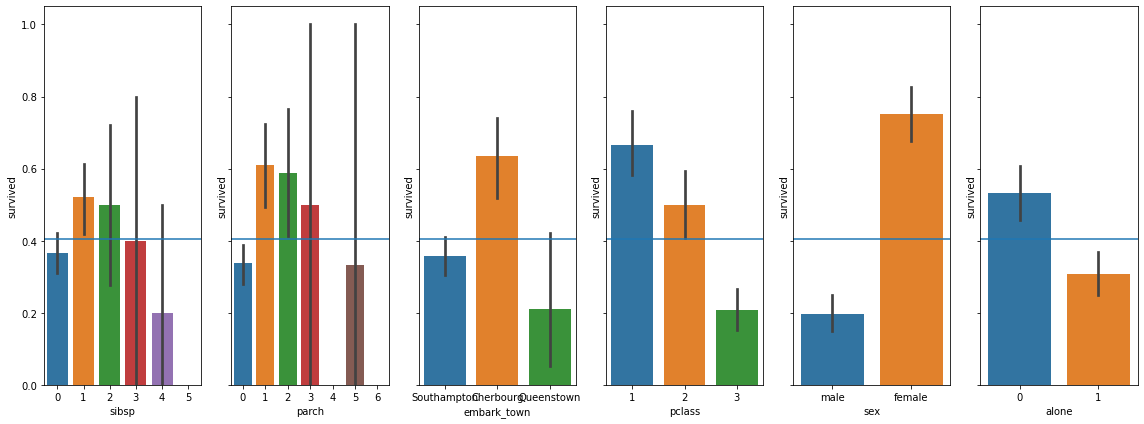

In [133]:
features = ['sibsp','parch','embark_town','pclass','sex','alone']

_, ax = plt.subplots(nrows=1, ncols = len(features), figsize=(16,6), sharey= True)
average = train.survived.mean()
for i, col in enumerate(features):
    sns.barplot(data = train, x = train[col], y='survived', ax=ax[i])
    ax[i].axhline(average)
    plt.tight_layout()
    

### Takeaways from the different categories:
    - sibsp: 1-2 more likely to survive than average
    - parch: 1-3 more likely to survive than average
    - embark town: Cherbourg had more survivors than others
    - pclass: 1 and 2 class better for survival
    - sex: female much better
    - alone: not alone better

In [134]:
numerics

Index(['age', 'fare'], dtype='object')

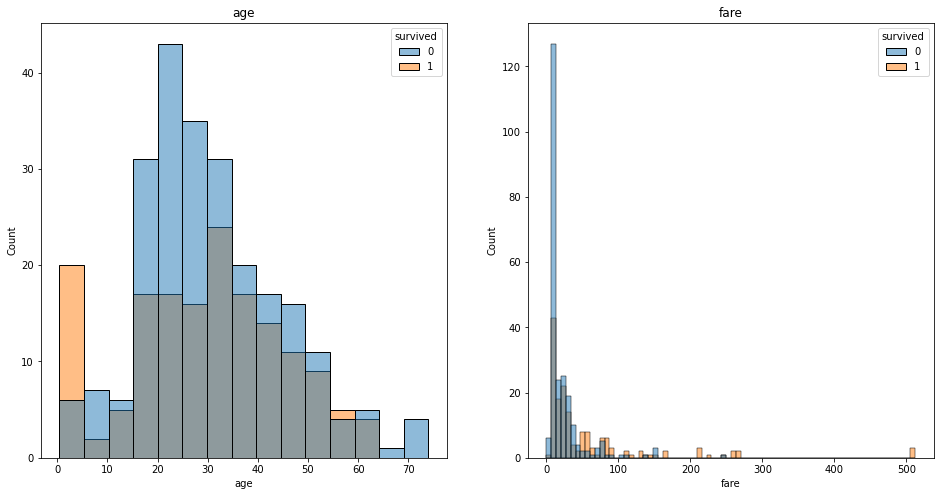

In [142]:
_,ax = plt.subplots(nrows=1, ncols=2, figsize=(16,8))
for i, col in enumerate(numerics):
    # train[col].plot.hist(ax=ax[i])
    sns.histplot(data = train, x = col, hue = 'survived', ax = ax[i])
    ax[i].set_title(col)
    

In [155]:
# bin ages into young < 18, middle 18-45, old >45
train['age_bin'] = pd.cut(train.age, bins = [min(train.age),18,45, max(train.age)], labels=['young','middle','old'])

<AxesSubplot:xlabel='age_bin', ylabel='survived'>

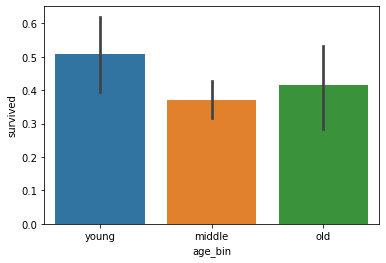

In [157]:
sns.barplot(data = train, x = 'age_bin', y ='survived')

In [158]:
train.age_bin.value_counts()

middle    266
young      71
old        60
Name: age_bin, dtype: int64

## Exploratory analysis: Telco (Part III)

In [300]:
df = get_telco_data()
df = df.drop(columns = ['payment_type_id','internet_service_type_id','contract_type_id','customer_id'])

Using cached data


In [301]:
df = df.astype({'senior_citizen':'object'})

In [302]:
df.shape

(7043, 20)

In [303]:
df = df.replace(' ',np.nan)

In [304]:
df = df.dropna()

In [305]:
df.shape

(7032, 20)

In [306]:
train, validate, test = train_validate_test_split(df, target = 'churn')

In [307]:
train.shape, validate.shape, test.shape

((3937, 20), (1688, 20), (1407, 20))

In [308]:
train.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
5919,Female,0,No,No,58,Yes,Yes,Yes,Yes,Yes,Yes,No,No,Yes,71.10,4299.2,No,One year,DSL,Credit card (automatic)
1915,Male,0,No,Yes,71,Yes,Yes,Yes,Yes,No,No,No,No,Yes,85.45,6028.95,No,One year,Fiber optic,Credit card (automatic)
5054,Female,0,Yes,Yes,35,Yes,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Yes,25.75,882.55,No,Month-to-month,None,Electronic check
2355,Male,0,Yes,Yes,1,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No,19.20,19.2,No,Month-to-month,None,Mailed check
6279,Male,1,No,No,20,Yes,No,Yes,No,No,Yes,No,No,No,54.00,1055.9,No,One year,DSL,Mailed check


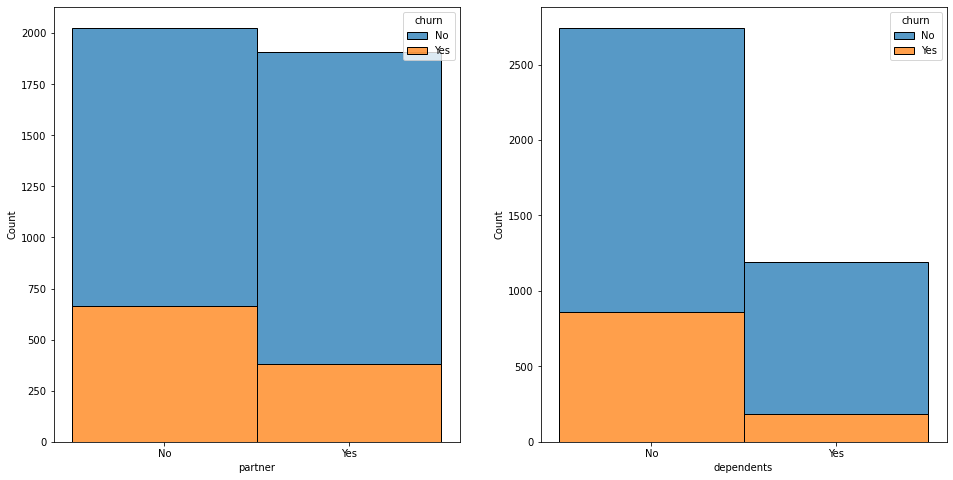

In [309]:
features = ['partner', 'dependents']

_,ax = plt.subplots(1,2, figsize=(16,8))

for i,col in enumerate(features):
    sns.histplot(data = train, x = train[col], hue = 'churn', multiple = 'stack', ax=ax[i])

In [310]:
catcol = train.columns[train.nunique()<5]

In [311]:
numcol = train.columns[train.nunique()>=5]

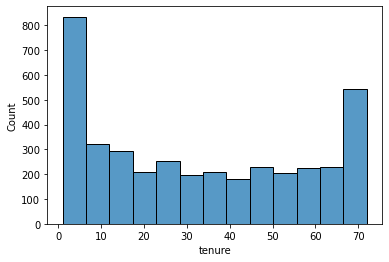

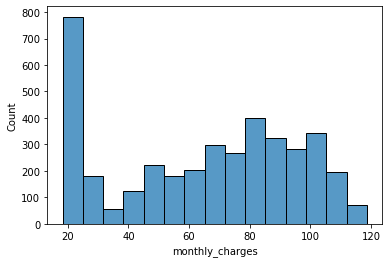

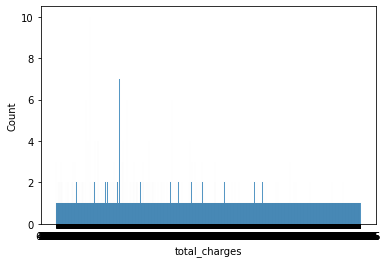

In [312]:
for feature in numcol:
    sns.histplot(data = train, x = feature)
    plt.show()
    

#### Takeaways: big concentration for monthly charges and tenure in lower values, and for tenure also in higher values

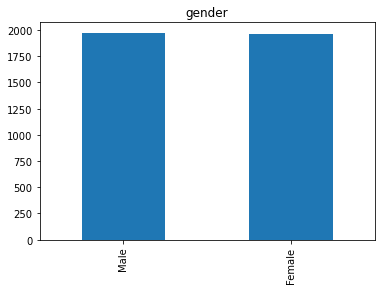

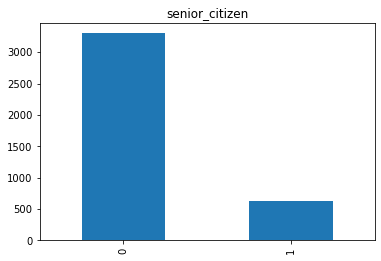

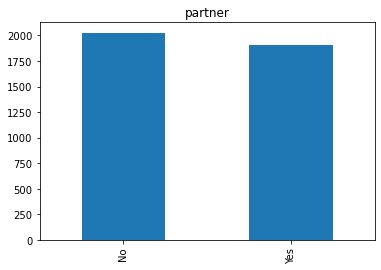

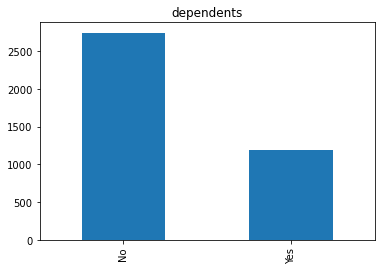

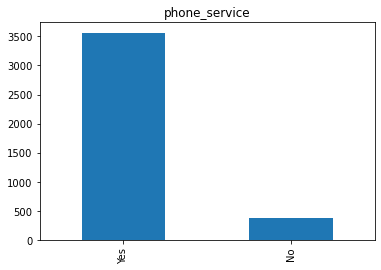

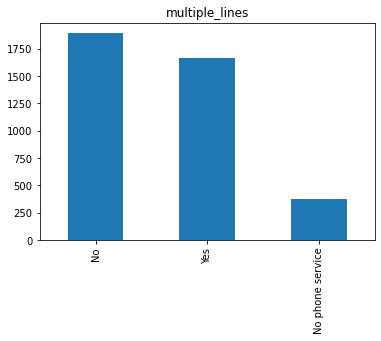

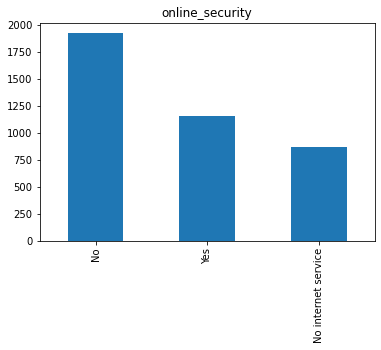

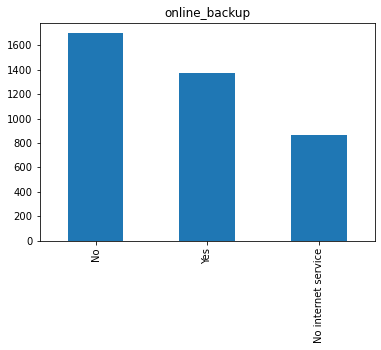

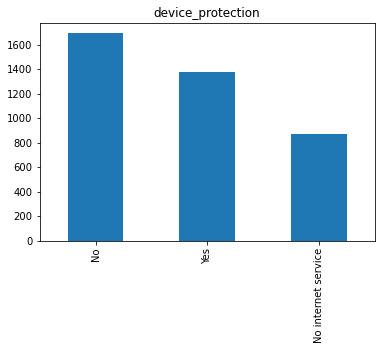

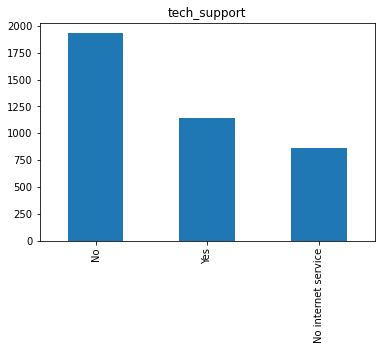

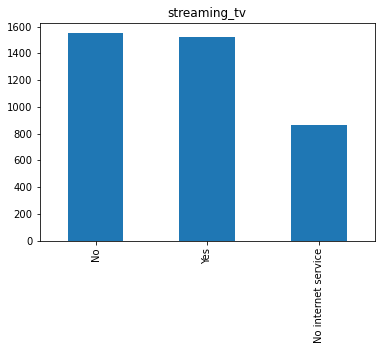

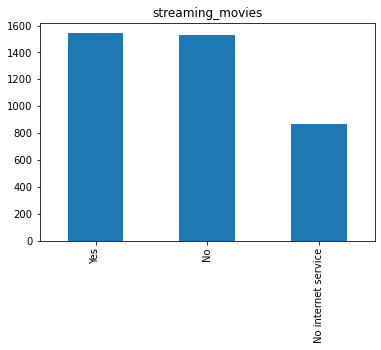

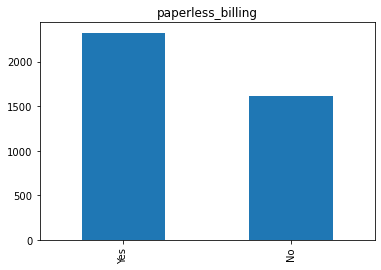

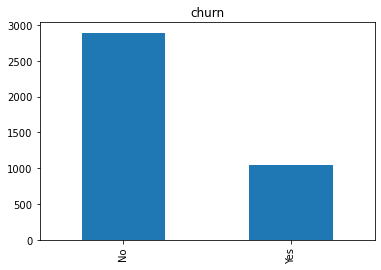

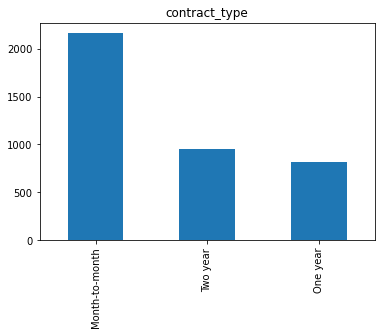

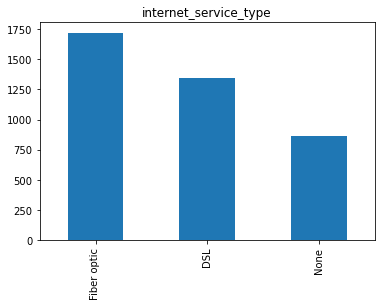

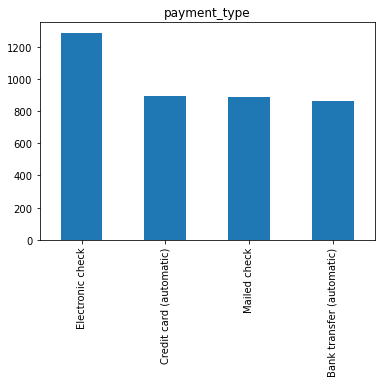

In [314]:
for feature in catcol:
    train[feature].value_counts().plot.bar()
    plt.title(feature)
    plt.show()

## Takeaways from univariate exploration of categorical variables:
    - Some grouping should be done streaming categories for "No internet service" and "No" - these should both be no or depending on if we are looking at these categories specifically maybe the "No internet service" should be removed
    

## Bivariate exploration

Text(0.5, 1.0, 'For a given tenure, those who churn are always paying more per month, with an interesting exception around 57')

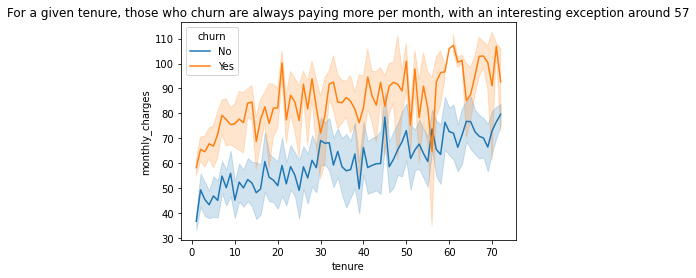

In [276]:
sns.lineplot(data = train, y = 'monthly_charges', x = 'tenure', hue = 'churn')
plt.title('For a given tenure, those who churn are always paying more per month, with an interesting exception around 57')

In [278]:
# Maybe worth testing statistically

<AxesSubplot:xlabel='tenure', ylabel='total_charges'>

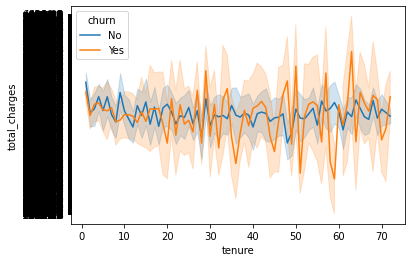

In [277]:
sns.lineplot(data = train, y = 'total_charges', x = 'tenure', hue = 'churn')



ValueError: Could not interpret input 'pclass'